# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [ ]:
# https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/
# 此網站教導如何從google images抓取圖片當成自己的資料庫

In [5]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

In [ ]:
#在此說明如何從google images取得圖片的url(java-scrip)網址

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [ ]:
# 第一步
# 以下3行將是從google images取得url存入以下.csv中；分別為"黑熊"、"泰迪熊"、"棕熊"，
# 執行一行跳到"path = Path('data/bears')"，創建資料夾

In [16]:
folder = 'black'
file = 'urls_black.txt'

In [13]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [8]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

You will need to run this cell once per each category.

In [ ]:
# 第二步
# 以下為創建資料夾(存圖片)

In [17]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[WindowsPath('data/bears/black'),
 WindowsPath('data/bears/cleaned.csv'),
 WindowsPath('data/bears/grizzly'),
 WindowsPath('data/bears/models'),
 WindowsPath('data/bears/teddys'),
 WindowsPath('data/bears/urls_black.txt'),
 WindowsPath('data/bears/urls_grizzly.txt'),
 WindowsPath('data/bears/urls_teddys.txt')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [11]:
classes = ['teddys','grizzly','black']

In [ ]:
# 第三步
# 以下為自動下載圖檔200張，接續上述url的.csv以及創建資料夾

In [18]:
download_images(path/file, dest, max_pics=200)

In [ ]:
# 若對於上面下載有問題就改成這樣
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [19]:
# 此程式是將所有的圖檔迭代一遍，運用fastai內的verify_images功能剔除非圖檔案(清理資料)
# verify_images(path/c"圖片位址", delete=True"如果圖片真有問題(為真)刪除", max_size=500/max_workers=8)
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


## View data

In [20]:
# 以上完成從google images下載、儲存(data/bears/...)、清理後得到一組資料
# 接著再將data分為訓練集、變異集ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# train="."(預設在path的所有資料),valid_pct=0.2(變異集從訓練集隨機取20%)
# 另外值得說明的是"np.random.seed(42)"雖然我們變異資料是隨機的從訓練集中產出，不過我們仍將該隨機固定(指每次產出的變異集皆固定)，
# 讓我們每次調整超參數才有固定的探討
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [21]:
#看資料
data.classes

['black', 'grizzly', 'teddys']

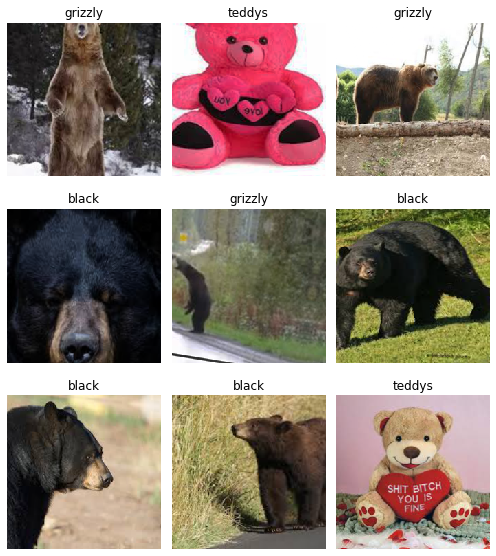

In [22]:
#看資料
data.show_batch(rows=3, figsize=(7,8))

In [23]:
# 觀看我們目前所設置的資料集狀態
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 384, 96)

## Train model

In [32]:
#導入cnn的resnet34模型及權重
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [33]:
#使用fastai的fit_one_cycle功能(詳細說明在lesson01)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.928895,0.258534,0.062500,00:38
1,0.550274,0.123128,0.052083,00:38
2,0.384369,0.103168,0.031250,00:38
3,0.303950,0.104652,0.020833,00:37


In [34]:
#將學習的參數儲存(詳細說明在lesson01)
learn.save('stage-1')

In [35]:
#將學習的權重參數解除固定~~,可以讓這次學習執行fine(詳細說明在lesson01)
learn.unfreeze()

In [36]:
#執行fastai中的learning rate搜尋功能
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


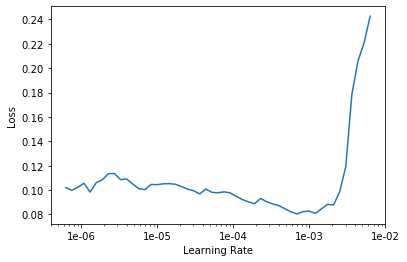

In [37]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
# 選擇learning rate圖中，曲線下降幅度較陡的區段
learn.recorder.plot()

In [38]:
# 選擇learning rate圖中，曲線下降幅度較陡的區段
learn.fit_one_cycle(2, max_lr=slice(6e-5,4e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.112320,0.117063,0.031250,00:38
1,0.080887,0.150945,0.052083,00:38


In [39]:
# 存下權重參數
learn.save('stage-2')

## Interpretation

In [40]:
learn.load('stage-2');

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

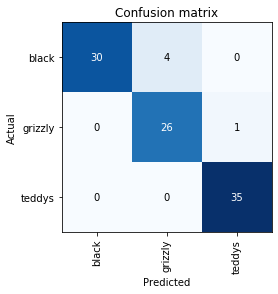

In [42]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [43]:
from fastai.widgets import *

In [ ]:
#ImageCleaner是fastai團隊開發，運用toploss函式來將差距最大的圖挑出，主要是要將loss大的圖刪除整理後再重新學習
#而該ImageCleaner工具開發在jupyter notebook之GUI框架中；若想多了解可搜尋ipwidgets即可更加了解GUI框架
#GUI框架開發只有在notebook中所以適合實驗者或者實驗室的，對於要產品落地的實踐仍有一定的困難

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [45]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [46]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [47]:
#toploss回傳損失(最差結果)及該索引標籤
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [48]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [49]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [50]:
??ImageCleaner

In [51]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [ ]:
#由上述Cleaning Up的布置在重新跑一次學習可能會發現改善非常有限(可能只有提升0.001%)，因為NN往往對於中等層度的noise有抵抗能力
#常常會聽到在google、aws上建置運用gpu的深度學習來產品化，不過實際運用上卻是單一分辨器(一次分辨一張)的應用比較多，針對gpu使用上並無太大需求
#所以接下來在這應用現成的模型來示範以cpu來建立一個分辨器use CPU for inference

In [52]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [53]:
#叫pytorch調用cpu
defaults.device = torch.device('cpu')

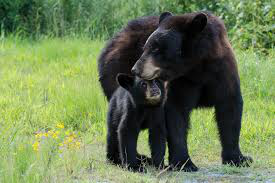

In [55]:
img = open_image(path/'black'/'00000025.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [56]:
#載入先前訓練好的模型(path)路徑
learn = load_learner(path)

In [57]:
#分辨器進行該圖預測
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

In [ ]:
#產品化的網頁式分辨器如下，
#"await"(不占用處理資源)常駐等待使用者輸入圖片來使該NN分辨輸出結果
#"async"確保該程序等待時不占用資源
#open_image後再調用NN predict，再來return response

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [58]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [59]:
#故意將learning rate調高到0.5，一般默認0.003；
#結果valid_loss值大到離譜，一般而言此數值大約1，同一資料下valid_loss變大則就要考量learning rate太大
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,13.465534,76837728.000000,0.718750,00:38


### Learning rate (LR) too low

In [60]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [61]:
#調整learning rate到0.00001
#比較上、下面error_rate，可以得到收斂速度有差異
#另外learning rate太低時train_loss會比valid_loss來得高；表示尚未擬和，當這樣的狀態出現時要考量learning rate太低、epochs太低
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.394354,1.304477,0.656250,00:38
1,1.382065,1.176437,0.635417,00:38
2,1.378657,1.137551,0.614583,00:38
3,1.347355,1.127519,0.562500,00:38
4,1.338624,1.139881,0.604167,00:38


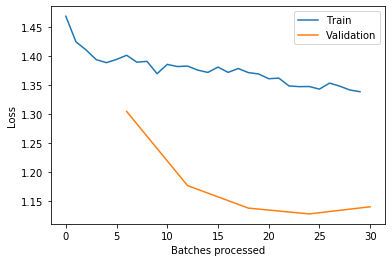

In [62]:
#調用learn.recorder來畫出valid_loss及error_rate可以得知下降速度很慢，依此可以得知learning rate太低
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [63]:
#epochs太低(次數太低)出現結果與learning-rate太低很相同，
#此時調高epochs，若訓練時間太長，將learning-rate調高，若learning-rate太高則valid_loss變大，調高epochs學習次數則降loss，這就是平衡~~
#在此models.resnet34非指其內部(pre-train)參數導入其中，而是將resnet結構函式導入而已
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [64]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.311013,1.020264,0.552083,00:38


### Too many epochs

In [65]:
#epochs次數太多，就會出現overfitting(過擬合)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [66]:
#現行NN訓練要產生過擬合不容易，在這裡要故意產生所以關閉dropout(隨機丟棄)、weight-decay(權重衰減)
#在此models.resnet50非指其內部(pre-train)參數導入其中，而是將resnet結構函式導入而已
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [67]:
#故意學習時間拉長
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.140135,1.600632,0.673611,00:40
1,1.224174,1.539103,0.675926,00:37
2,1.235909,1.473857,0.682870,00:37
3,1.255156,1.401212,0.699074,00:36
4,1.216880,1.322352,0.689815,00:36
5,1.206599,1.223836,0.678241,00:36
6,1.166359,1.125031,0.636574,00:36
7,1.116048,1.020389,0.527778,00:36
8,1.050061,0.908973,0.416667,00:36
9,0.980585,0.806128,0.344907,00:36


In [ ]:
#很多人說train_loss比valid_loss小就是over-fitting，這次錯誤觀念~~~
#一般而言一個正確的model來訓練都會train_loss比valid_loss小

#####正確來說over-fitting則會有error_rate反轉升高的跡象#####(因為在訓練的過程主要是希望error_rate越來越低)
#其中有4件事情會使狀態變糟~~下周分解

In [68]:
??learn.predict

In [69]:
??accuracy

In [70]:
??error_rate

In [71]:
doc(accuracy)

In [ ]:
#1.一般而言多少訓練圖才算夠??
#1.無法有確定的答案，如何推斷訓練資料不夠?(當learning-rate調高時錯誤率變大，當learning-rate調低時損失下降又很慢，找出最佳的learning-rate；
#  而當訓練好一段時間後錯誤率又變大了，訓練好一段時間仍然沒達到好的準確率...當然本課程之後會教一些技巧，不過此時就可以考慮訓練集的資料不足的選項)

#2.當資料集不平均怎麼辦??(例如黑熊100張、棕熊50張)
#2.儘管訓練就可不見得一定要資料平均，在經驗而言講者做過很多不平均的資料集訓練也沒出現有不好的結果，當然有些論文研究也有提到平均資料集的優勢，
#  提出將較少資料集的類別擴展(副本)資料，叫oversampling~~~